# Characters Classification with Neural Networks

In this notebook we are going to use the Neural Networks for image classification. We are going to use the same dataset of the lab on SVM: Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) a dataset of traditional japanese handwritten kana.

The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

In [1]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scikit-learn version:  0.24.2


In [2]:
# helper function to load KMNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Set as seed for the random generator your Student ID (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [3]:
ID = 123456789
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the K-MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the K-MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time while 4000 samples will be used for testing. Make sure that each label is present at least 10 times in train and test set frequencies.

In [5]:
#random permute the data and split into training and test taking the first 600
#data samples as training and 4000 as test set
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labelsT, freqsT = np.unique(y_test, return_counts=True)
print("Labels in test set: ", labels)
print("Frequencies in test set: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [59 59 67 63 54 62 49 62 72 53]
Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [59 59 67 63 54 62 49 62 72 53]


In [6]:
for i in range(0,3):
    
    print(X[i])
    print('\n')
    print('\n')

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [7]:
for i in range(0,3):
    
    print(y[i])
    print('\n')
    print('\n')

7




2




9






In [8]:



#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


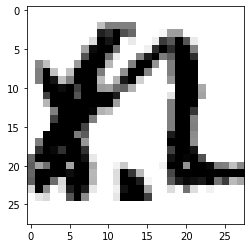

LABEL: 8
INPUT:


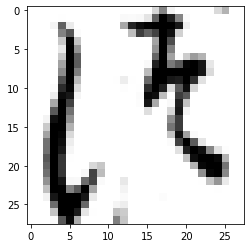

LABEL: 3
INPUT:


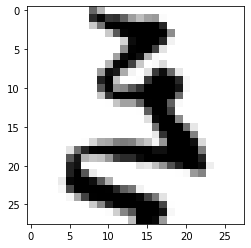

LABEL: 1


In [9]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)

### TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=100, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 50. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [10]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (20,), (40,), (20,20,), (40,20,10) ]}

mlp = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

grid = GridSearchCV(mlp, parameters, cv=5)
grid.fit(X_train,y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(grid.best_params_)

print("Score with best parameters:")
print(grid.best_score_)

print("\nAll scores on the grid:")
print(grid.cv_results_['mean_test_score'])

print('All scores:')
print(grid.cv_results_)

RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (40,)}
Score with best parameters:
0.75

All scores on the grid:
[0.7        0.74       0.75       0.695      0.70666667]
All scores:
{'mean_fit_time': array([6.07600346, 0.63698325, 0.46795077, 0.6193891 , 0.72791638]), 'std_fit_time': array([3.03290092, 0.16173331, 0.06139029, 0.41606136, 0.52171669]), 'mean_score_time': array([0.00735297, 0.00092034, 0.00133505, 0.00142474, 0.00187569]), 'std_score_time': array([0.0048068 , 0.0001114 , 0.00046932, 0.00066145, 0.00098865]), 'param_hidden_layer_sizes': masked_array(data=[(10,), (20,), (40,), (20, 20), (40, 20, 10)],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'hidden_layer_sizes': (10,)}, {'hidden_layer_sizes': (20,)}, {'hidden_layer_sizes': (40,)}, {'hidden_layer_sizes': (20, 20)}, {'hidden_layer_sizes': (40, 20, 10)}], 'split0_test_score': array([0.69166667, 0.74166667, 0.775     , 0.71666667, 0.

### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [11]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size': [1, 32, 480]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)

#ADD YOUR CODE

# recall to use cv=kf to use the k-fold subdivision seen in the lectures

mlp = MLPClassifier(max_iter=100, hidden_layer_sizes=(40,), alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

grid = GridSearchCV(mlp, parameters, cv=kf)
grid.fit(X_train,y_train)




print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(grid.best_params_)

print("Score with best parameters:")
print(grid.best_score_)

print("\nAll scores on the grid:")
print(grid.cv_results_['mean_test_score'])

print('All scores:')
print(grid.cv_results_)

/Users/filippoboni/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Users/filippoboni/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filippoboni/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filippoboni/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filippoboni/opt/anaconda3/lib/python

RESULTS FOR NN

Best parameters set found:
{'batch_size': 32}
Score with best parameters:
0.7616666666666667

All scores on the grid:
[0.095      0.76166667 0.74      ]
All scores:
{'mean_fit_time': array([11.86959062,  0.3656682 ,  0.37701421]), 'std_fit_time': array([3.61327114, 0.13120496, 0.09784857]), 'mean_score_time': array([0.00080061, 0.00086875, 0.00155816]), 'std_score_time': array([0.00026011, 0.00021131, 0.00109922]), 'param_batch_size': masked_array(data=[1, 32, 480],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'batch_size': 1}, {'batch_size': 32}, {'batch_size': 480}], 'split0_test_score': array([0.09166667, 0.76666667, 0.725     ]), 'split1_test_score': array([0.10833333, 0.78333333, 0.76666667]), 'split2_test_score': array([0.10833333, 0.78333333, 0.71666667]), 'split3_test_score': array([0.075     , 0.73333333, 0.73333333]), 'split4_test_score': array([0.09166667, 0.74166667, 0.75833333]), 'mean_test_score': a

### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

## [ANSWER TO QUESTION 1]

It is possible to see that the chosen architecture among the ones analized is at the same time not too simple and not too complex. Thus the number of layers and neurons chose are the ones that permit to have a low training error and a good degree of generalisationamong the one analized. Indeed the other architecture could be affected by overffitting or by low precision in learning from the training set.

Also in the batch size tunation the middle option is chosen. Applying the baseline SGD leads to a not convergent algorithm. While the normal GD leads to a good validation error but the best choice is the minibatch method, also computationally speaking. 

### TODO 3:

Plot the train and test accuracies as a function of the number of learnable parameters in your neural network. Print also the computation time for the various configurations you try (the code for getting the computation time is already provided). You can use 100 iterations (if you get a warning on convergence not reached it is not an issue for this lab)

10
20
40
20
40
Training MLP of size (10,) ...
Done, training time: 0.55 sec

Training MLP of size (20,) ...
Done, training time: 0.25 sec

Training MLP of size (40,) ...
Done, training time: 0.67 sec

Training MLP of size (20, 20) ...
Done, training time: 0.32 sec

Training MLP of size (40, 20, 10) ...
Done, training time: 0.34 sec



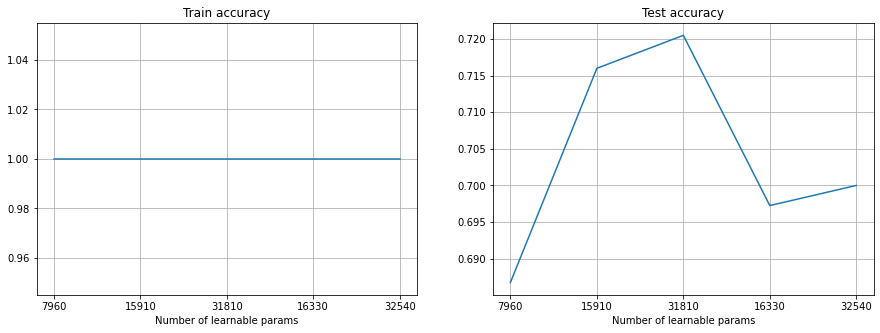

In [12]:
import time
from functools import reduce



# Function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = X_train.shape[1], len(labels)
    tot += (input_size+1)*hl_size[0]
    print(hl_size[0])
    for i in range(1,len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

hl_sizes = [(10,), (20,), (40,), (20,20,), (40,20,10)]
hl_labels = [param_count(t) for t in hl_sizes]

ti = time.time()
train_acc_list, test_acc_list = [], []
for hl_size in hl_sizes:
    print('Training MLP of size {} ...'.format(hl_size))
    
    mlp = MLPClassifier(max_iter=100, hidden_layer_sizes=hl_size, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)
    
    mlp.fit(X_train, y_train)
    
    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig, ax = plt.subplots(1,2, figsize=(15,5))


ax[0].plot(train_acc_list)
ax[0].set_xlabel('Number of learnable params')
ax[0].set_title('Train accuracy')
ax[0].set_xticks(np.arange(0,len(hl_labels)))
ax[0].set_xticklabels(hl_labels)
ax[0].grid(True)

ax[1].plot(test_acc_list)
ax[1].set_xlabel('Number of learnable params')
ax[1].set_title('Test accuracy')
ax[1].set_xticks(np.arange(0,len(hl_labels)))
ax[1].set_xticklabels(hl_labels)
ax[1].grid(True)


## Question 2:

Comment about the training and test accuracies referring to the discussion on underfitting and overfitting we did in the course

## [ANSWER TO QUESTION 2]

The training accuracy is the same for all the cases while the test accuracy has its top in correspondence of 31810. As seen in the analysis of the number of layers the second case has the second best test accuracy. It is obvious from the test accuracy values that the last two cases are affected by overfitting because of their high number of parameters. While the first case has a bad test accuracy because the number of parameters is too low. Thus it is affected by underfitting.

### TO DO 4

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. Try to run each training for 100 iterations. 

/Users/filippoboni/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filippoboni/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filippoboni/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/filippoboni/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


RESULTS FOR NN

Best parameters set found:
{'learning_rate_init': 0.02}
Score with best parameters:
0.745

All scores on the grid:
[0.62       0.74166667 0.745      0.67833333]
All scores:
{'mean_fit_time': array([1.1357748 , 1.06856613, 0.80141544, 0.25902801]), 'std_fit_time': array([0.16894532, 0.41403769, 0.11733807, 0.09551994]), 'mean_score_time': array([0.00084796, 0.0008544 , 0.00060334, 0.00063362]), 'std_score_time': array([4.94585192e-05, 2.58618118e-05, 2.15362593e-05, 9.21091664e-05]), 'param_learning_rate_init': masked_array(data=[0.0002, 0.002, 0.02, 0.2],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'learning_rate_init': 0.0002}, {'learning_rate_init': 0.002}, {'learning_rate_init': 0.02}, {'learning_rate_init': 0.2}], 'split0_test_score': array([0.575     , 0.74166667, 0.73333333, 0.675     ]), 'split1_test_score': array([0.625     , 0.76666667, 0.76666667, 0.70833333]), 'split2_test_score': array([0.5833

/Users/filippoboni/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


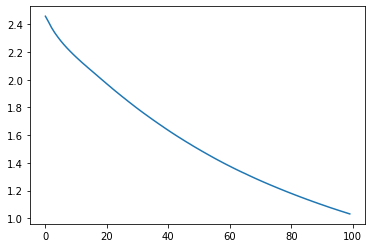

/Users/filippoboni/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


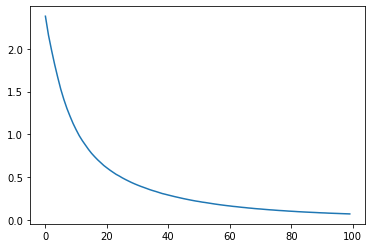

/Users/filippoboni/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


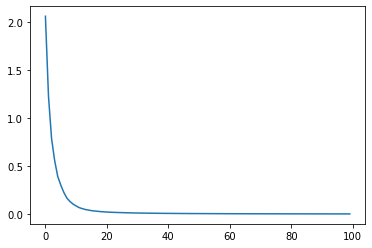

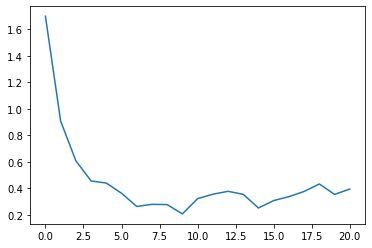

In [13]:
import matplotlib.pyplot as plt
import operator

lr_list = [0.0002, 0.002, 0.02, 0.2]
scores = {}

parameters={'learning_rate_init':lr_list}

mlp = MLPClassifier(max_iter=100, hidden_layer_sizes=(40,), alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    batch_size=32)

grid = GridSearchCV(mlp, parameters, cv=kf)
grid.fit(X_train,y_train)


print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(grid.best_params_)

print("Score with best parameters:")
print(grid.best_score_)

print("\nAll scores on the grid:")
print(grid.cv_results_['mean_test_score'])

print('All scores:')
print(grid.cv_results_)

for l in lr_list:
    
    mlp = MLPClassifier(max_iter=100, hidden_layer_sizes=(40,), alpha=1e-4, solver='sgd',
                    tol=1e-10, random_state=ID,
                    learning_rate_init=l, batch_size=32)
    
    mlp.fit(X_train, y_train)
    
    loss_values = mlp.loss_curve_
    
    plt.plot(loss_values)
    plt.show()




### QUESTION 3

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

## [ANSWER TO QUESTION 3]


Seeing the learning curves it is possbile to characterize the first and the last learning rates as the extreme cases. Indeed with the learning rate equal to 0.0002 there is the convergence but it is too slow while with the learning rate equal to 0.2 the learning process is too unstable. This can be seen by the fact that the learning cuves stops after 20 epochs. This means that after that point there is not possibility to minimize the curve.

The other cases are good but the third one (learning rate=0.02) is the best. This can be seen comparing the two scores and the two curves. Indeed the third case has a faster convergence.

### TO DO 5

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate) from above. Plot the learning curve also for this case (you can run the training for 500 iterations).


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.275750


/Users/filippoboni/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


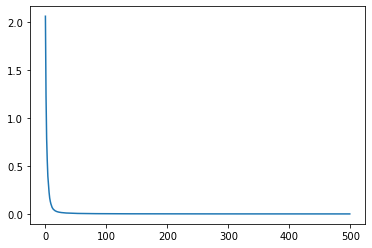

In [14]:
#get training and test error for the best NN model from CV

mlp = MLPClassifier(max_iter=500, hidden_layer_sizes=(40,), alpha=1e-4, solver='sgd',
                    tol=1e-10, random_state=ID,
                    learning_rate_init=0.02, batch_size=32)
    
mlp.fit(X_train, y_train)

training_error=1-mlp.score(X_train, y_train)
test_error=1-mlp.score(X_test, y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)


loss_values = mlp.loss_curve_
        
plt.plot(loss_values)
plt.show()



## More data 
Now let's do the same but using 4000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer!!

In [15]:
X = X[permutation]
y = y[permutation]

m_training = 5000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [480 493 498 496 556 508 486 492 503 488]


### TO DO 6

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [16]:
# use best architecture and params from before

mlp_large = MLPClassifier(max_iter=100, hidden_layer_sizes=(40,), alpha=1e-4, solver='sgd',
                    tol=1e-10, random_state=ID, verbose=True,
                    learning_rate_init=0.02, batch_size=32)
    
mlp_large.fit(X_train, y_train)



print ('\nRESULTS FOR NN\n')

#get training and test error for the NN

training_error=1-mlp_large.score(X_train, y_train)
test_error=1-mlp_large.score(X_test, y_test)

print ("NN training error: %f" % training_error)
print ("NN test error: %f" % test_error)


Iteration 1, loss = 1.02137978
Iteration 2, loss = 0.52612318
Iteration 3, loss = 0.39994027
Iteration 4, loss = 0.31208391
Iteration 5, loss = 0.25726963
Iteration 6, loss = 0.20480960
Iteration 7, loss = 0.16348350
Iteration 8, loss = 0.13204388
Iteration 9, loss = 0.09985163
Iteration 10, loss = 0.08699260
Iteration 11, loss = 0.06840934
Iteration 12, loss = 0.05331781
Iteration 13, loss = 0.03936605
Iteration 14, loss = 0.03076517
Iteration 15, loss = 0.02599192
Iteration 16, loss = 0.02077726
Iteration 17, loss = 0.01749463
Iteration 18, loss = 0.01548352
Iteration 19, loss = 0.01397720
Iteration 20, loss = 0.01255040
Iteration 21, loss = 0.01138215
Iteration 22, loss = 0.01035579
Iteration 23, loss = 0.00951101
Iteration 24, loss = 0.00881536
Iteration 25, loss = 0.00829633
Iteration 26, loss = 0.00771088
Iteration 27, loss = 0.00728495
Iteration 28, loss = 0.00686667
Iteration 29, loss = 0.00657767
Iteration 30, loss = 0.00623404
Iteration 31, loss = 0.00597296
Iteration 32, los

/Users/filippoboni/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


## QUESTION 4
Compare the train and test error you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

#### [ANSWER TO QUESTION 4]

The training error is 0 in both cases while the test error is better in the case with more data. This was expected because the NN performances are strongly linked with dimension of the trainig set

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=4000 training data points.

In [17]:
NN_prediction = mlp.predict(X_train)
NN_prediction = np.asarray(NN_prediction)

large_NN_prediction = mlp_large.predict(X_train)
large_NN_prediction = np.asarray(large_NN_prediction)


for i in range(np.size(large_NN_prediction)):
    if y_test[i]!=NN_prediction[i] and  y_test[i]==large_NN_prediction[i]:
        print(f' index and element of the test set: {i}, {y_test[i]}')
        print(f' wrong prediction of the NN with 600 data: {NN_prediction[i]}')
        print(f' wright prediction of the NN with 5000 data: {large_NN_prediction[i]}')
        break
        

 index and element of the test set: 28, 2
 wrong prediction of the NN with 600 data: 5
 wright prediction of the NN with 5000 data: 2


### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 4000 data points. The code is already provided, just fix variable names (e.g., replace mlp , mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


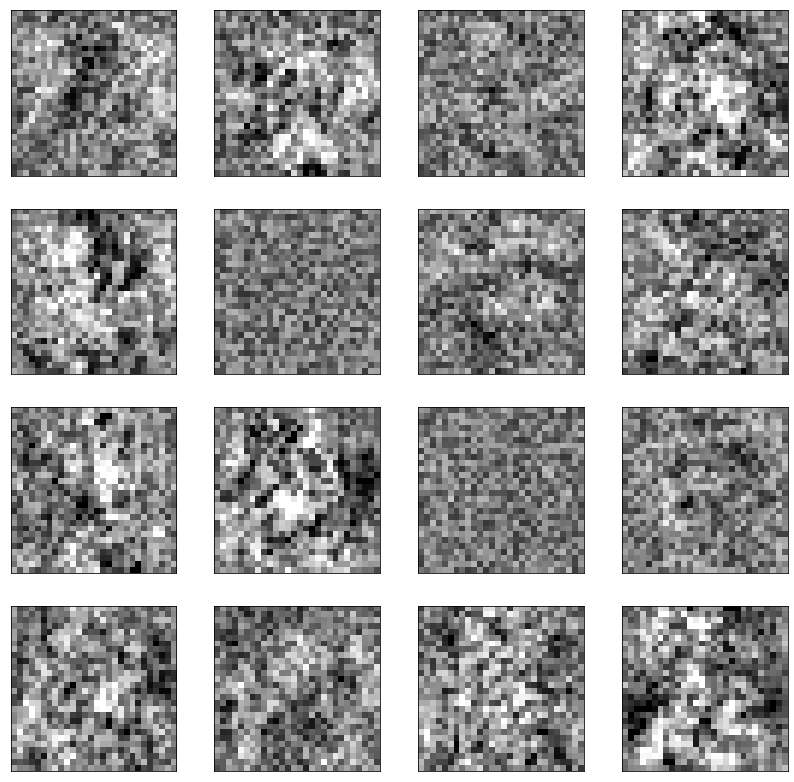

In [18]:
print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 4, figsize=(14,14))
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()



Weights with 5000 data points:


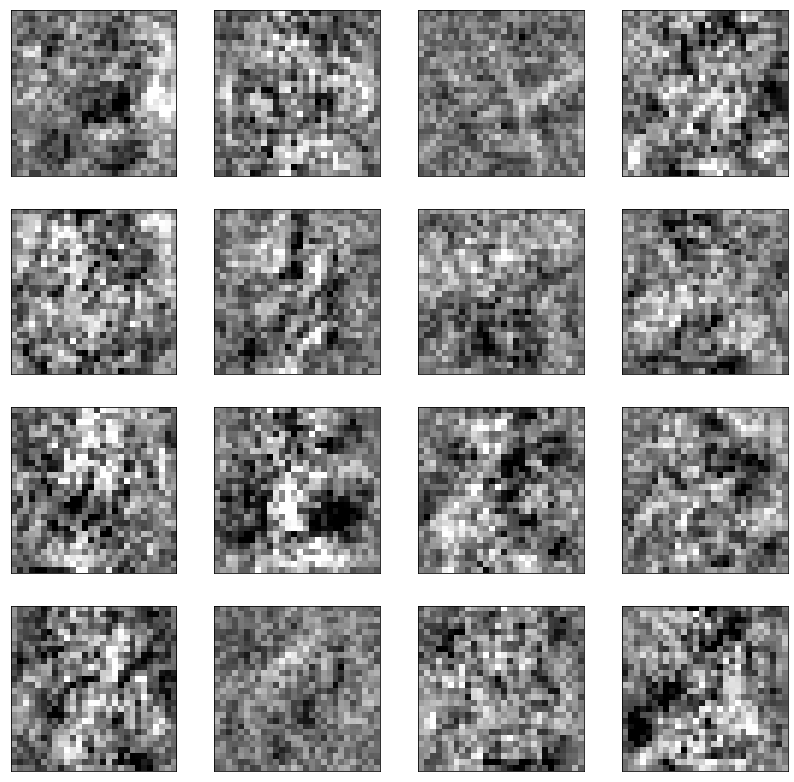

In [19]:
print("Weights with 5000 data points:")

fig, axes = plt.subplots(4, 4, figsize=(14,14))
vmin, vmax = mlp_large.coefs_[0].min(), mlp_large.coefs_[0].max()
for coef, ax in zip(mlp_large.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 5

Describe what do you observe by looking at the weights.

##### [ANSWER TO QUESTION 5]

It is difficult to understand what the images represent. What it is possible to see that the shapes shown in the images are more defined in the case with more datas.

### TO DO 9

Take the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores. Then fit also a logistic regression model with C=1. 

In [ ]:
m_training = 5000

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

# use best parameters found in the SVM notebook, create SVM and perform fitting

svc = SVC(C=10, kernel='rbf', gamma=0.01)

svc.fit(X_train, y_train)


print ('RESULTS FOR SVM')

SVM_training_error =  1-svc.score(X_train, y_train)

print("Training score SVM:")
print(SVM_training_error)

SVM_test_error = 1-svc.score(X_test, y_test)
print("Test score SVM:")
print(SVM_test_error)

In [ ]:
from sklearn import linear_model

regL2 = linear_model.LogisticRegression(C=1)

# you can re-use your code from Lab 2

regL2.fit(X_train, y_train)

print ('\nRESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION')

training_error =  1-regL2.score(X_train, y_train)
test_error =  1-regL2.score(X_test, y_test)



print ("Training error (reg): %f" % training_error)
print ("Test error (reg): %f" % test_error)

## QUESTION 6
Compare the results of Logistic Regression, SVM and NN. Which one achieve the best results? 

###### [ANSWER TO QUESTION 6]
Comparing the training error the SVM and the NN give the same result while the Logistic Regression gives a worse error. While comparing the test error the SVM gives the best result, the NN gives the second best result and the Linear regression the worst one. 

This means that for this kind of classification the SVM algorithm is better than the others. Maybe a CNN could give a better result.